## importing libraries

In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats as st
import warnings
warnings.filterwarnings('ignore')

## Reading datasets

## reading the file that contains the locations of the towns

In [3]:
stations = pd.read_csv('towns.csv')#, delimter = ',')
stations

,station,lat,lon
0,Yendi,9.4450,-0.0093
1,Axim,4.8665,-2.2409
2,Tarkwa,5.3018,-1.9930


## Annual timescale

### calculating annual climatology and saving it in a dataFrame

In [4]:
station =  stations.iloc[:,0]
lon = stations.iloc[:,2]
lat = stations.iloc[:,1]

gauge_stations = pd.DataFrame(data = pd.date_range(start = '2015',end ='2021', freq ='M'), columns = ['Time']).set_index('Time')
cmip_stations = pd.DataFrame(data = pd.date_range(start = '2015',end ='2021', freq ='M'), columns = ['Time']).set_index('Time')
#CHIRPS_stations = pd.DataFrame(data = pd.date_range(start = '1981',end ='2020', freq ='Y'), columns = ['Year']).set_index('Year')
gauge_ann = pd.DataFrame()
cmip_ann = pd.DataFrame()
for i,j in enumerate(lon):
    
    gg = gauge.groupby('time.year').sum('time').sel(longitude = j, latitude = lat[i], method = 'nearest')
    #gauge_st = gg.to_datafrane().drop(['latitude', 'longitude'], axis = 1)
    gauge_ann[station[i]] = gg
    
    cm = cmip.groupby('time.year').sum('time').sel(lon = lon[i], lat = j, method = 'nearest')
    #cmip_st = cm.to_dataframe().drop(['lon', 'lat'], axis = 1)
    cmip_ann[station[i]] = cm
    

### plotting a timeseries for the annual timescale

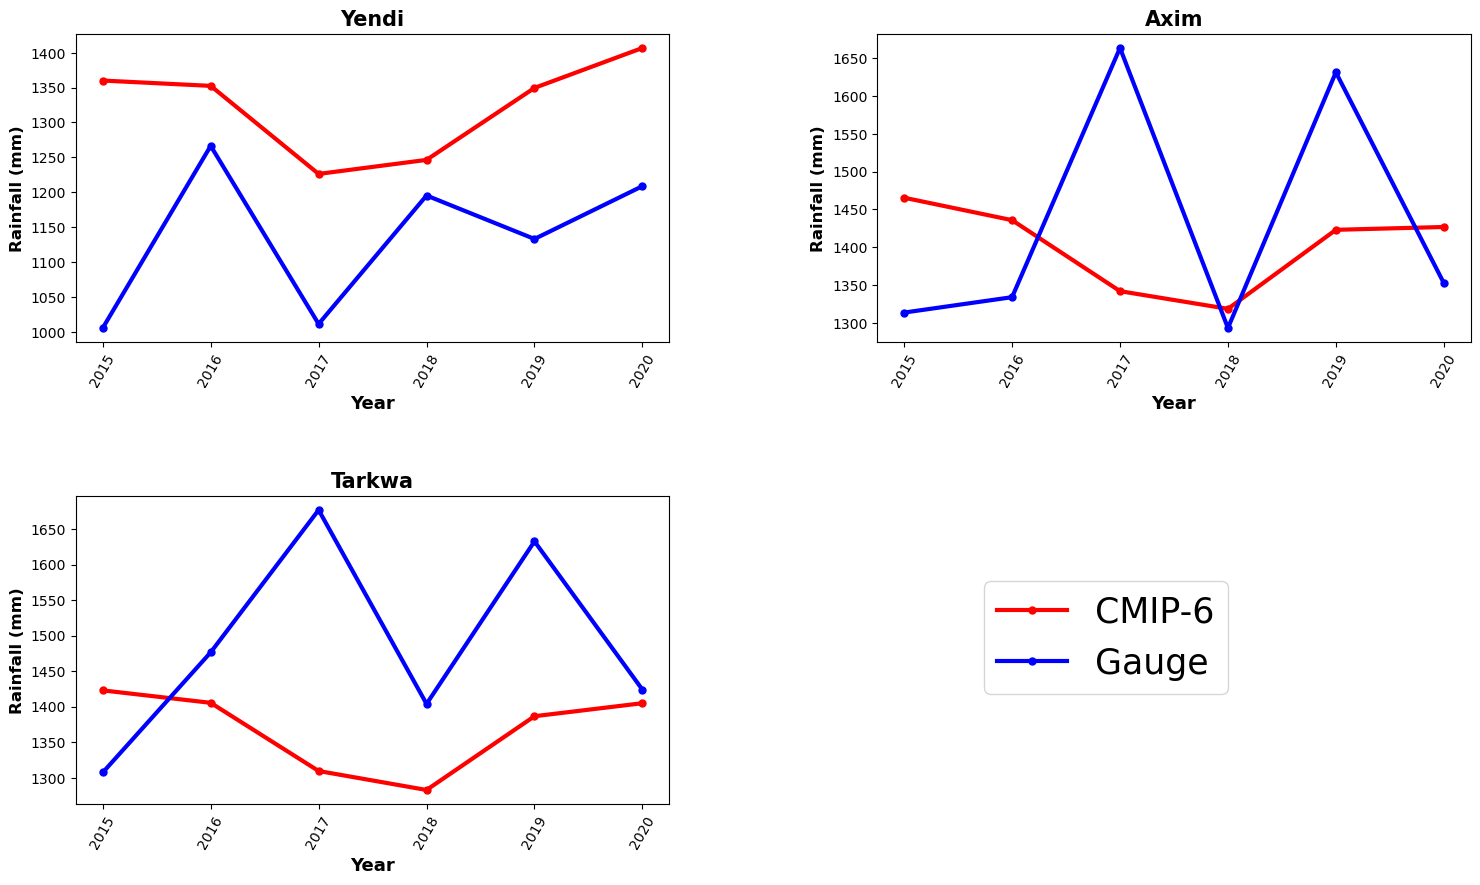

In [5]:
fig, axes = plt.subplots(ncols=2, nrows=2, figsize=(18,10),sharex = False)
#plt.subplots_adjust(bottom=0.05, top=0.95)
plt.subplots_adjust(hspace=0.5, wspace=0.35, )

years = ['2015', '2016', '2017', '2018', '2019', '2020']

axes[1,1].remove()

axes[0,0].set_title('Yendi', fontsize = 15, fontweight = "bold")
axes[0,0].plot(cmip_ann.Yendi, label = 'CMIP-6', color = 'red', lw = 3, marker = 'o', markersize = 5)
axes[0,0].plot(gauge_ann.Yendi, label = 'Gauge', color = 'blue', lw = 3, marker = 'o', markersize = 5)
axes[0,0].set_ylabel('Rainfall (mm)',fontsize=12, fontweight = "bold")

axes[0,1].set_title('Axim', fontsize = 15, fontweight = "bold")
axes[0,1].plot(cmip_ann.Axim, label = 'CMIP-6', color = 'red', lw = 3, marker = 'o', markersize = 5)
axes[0,1].plot(gauge_ann.Axim, label = 'Gauge', color = 'blue', lw = 3, marker = 'o', markersize = 5)
axes[0,1].set_ylabel('Rainfall (mm)',fontsize=12, fontweight = "bold")
axes[0,1].set_xticks(np.arange(0,6,1))
axes[0,1].set_xticklabels(years, rotation = 60)

axes[1,0].set_title('Tarkwa', fontsize = 15,fontweight = "bold")
axes[1,0].plot(cmip_ann.Tarkwa, label = 'CMIP-6', color = 'red', lw = 3, marker = 'o', markersize = 5)
axes[1,0].plot(gauge_ann.Tarkwa, label = 'Gauge', color = 'blue', lw = 3, marker = 'o', markersize = 5)
axes[1,0].legend(fontsize = 25,loc= 'lower left', ncol=1, bbox_to_anchor=(1.5, 0.3))
axes[1,0].set_ylabel('Rainfall (mm)',fontsize=12, fontweight = "bold")

ax = axes.flatten()
for ax in axes:
    ax[0].set_xlabel('Year',fontsize=13, fontweight = "bold")#, fontweight = "bold")
    ax[1].set_xlabel('Year',fontsize=13, fontweight = "bold" )#, fontweight = "bold")
    ax[0].set_xticks(np.arange(0,6,1))
    ax[0].set_xticklabels(years, rotation = 60,)
 
    
    
plt.savefig('ANNUAL.jpg')

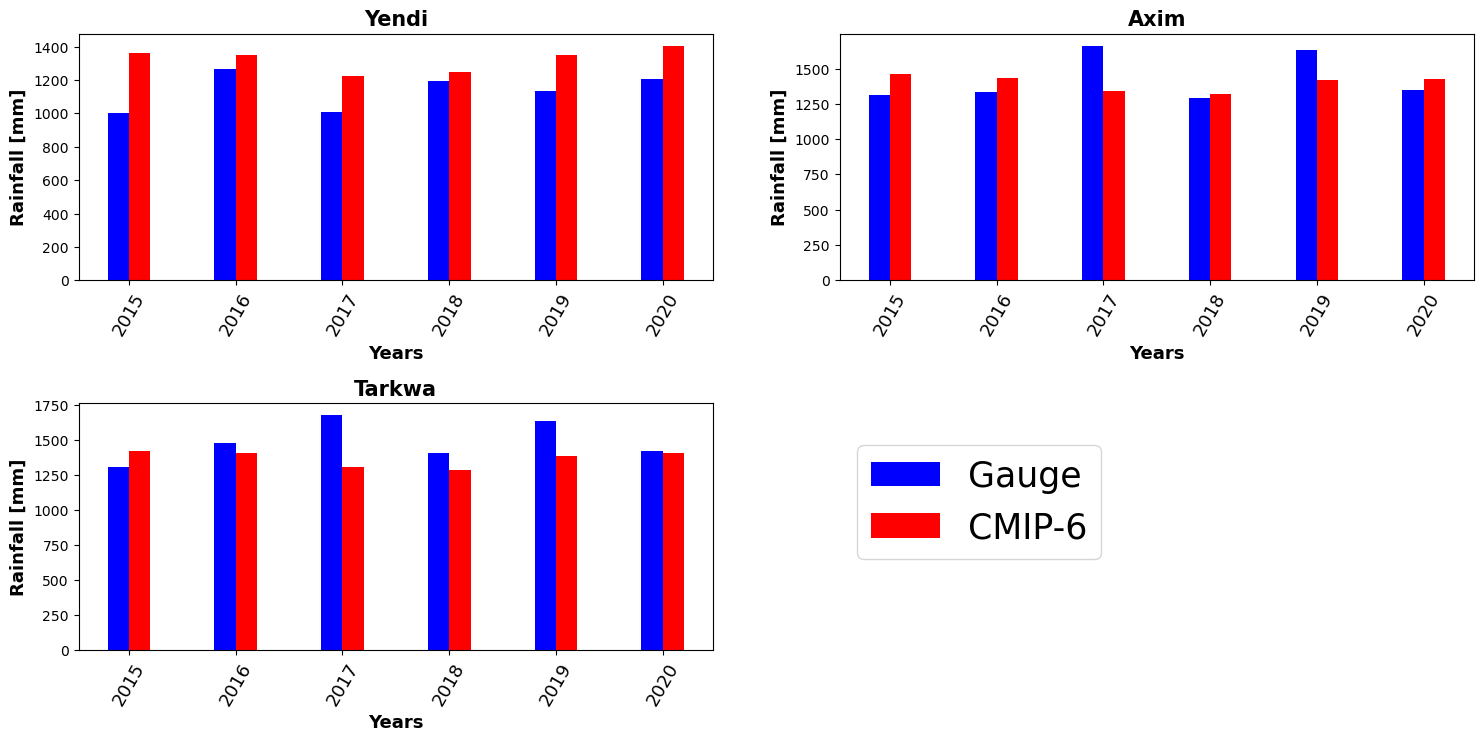

In [6]:
fig, axes = plt.subplots(ncols = 2, nrows = 2,figsize = (18,8))
plt.subplots_adjust(hspace = 0.5, wspace = 0.2)


y = np.arange(len(years))
# plotting bar chart
axes[0,0].set_title('Yendi', fontweight = 'bold', fontsize = 15,)
axes[0,0].bar(y-0.1, gauge_ann.Yendi, color='blue', width = 0.2,  label = 'Gauge')
axes[0,0].bar(y+0.1, cmip_ann.Yendi, color='red', width = 0.2,  label = 'CMIP-6')
axes[0,0].set_xticks(np.arange(0,6,1))
axes[0,0].set_xticklabels(years, rotation = 60, fontsize = 13)


axes[0,1].set_title('Axim', fontweight = 'bold', fontsize = 15)
axes[0,1].bar(y-0.1, gauge_ann.Axim, color='blue', width = 0.2,  label = 'Gauge')
axes[0,1].bar(y+0.1, cmip_ann.Axim, color='red', width = 0.2,  label = 'CMIP-6')
axes[0,1].set_xticks(np.arange(0,6,1))
axes[0,1].set_xticklabels(years, rotation = 60, fontsize = 13)




axes[1,0].set_title('Tarkwa', fontweight = 'bold', fontsize = 15,)
axes[1,0].bar(y-0.1, gauge_ann.Tarkwa, color='blue', width = 0.2,  label = 'Gauge')
axes[1,0].bar(y+0.1, cmip_ann.Tarkwa, color='red', width = 0.2,  label = 'CMIP-6')
axes[1,0].set_xticks(np.arange(0,6,1))
axes[1,0].set_xticklabels(years, rotation = 60, fontsize = 13)
axes[1,0].legend(fontsize = 25,loc= 'lower left', ncol=1, bbox_to_anchor=(1.2, 0.3))
axes[1,0].set_ylabel('Rainfall (mm)',fontsize=12, fontweight = "bold")


#axes[0,1].set_title('Timeseries for August', fontweight = 'bold', fontsize = 13)
#axes[0,0].set_title('Bar Chart for August', fontweight = 'bold', fontsize = 13)



#axes[1,0].plot(x, y1, color = 'red', lw = 3, marker = 'o', markersize = '5')
#axes[1,0].bar(x,y1, color = 'blue')
#axes[1,0].set_title('Bar Chart and Timseries for June', fontweight = 'bold', fontsize = 13)


axes[1,1].remove()

ax = axes.flatten()
for i, a in enumerate(ax):
    #ax[i].set_xlim(1898,2017)
    ax[i].set_ylabel("Rainfall [mm]" ,fontweight = 'bold', fontsize = 13)
    ax[i].set_xlabel("Years" ,fontweight = 'bold', fontsize = 13)
    #ax[i].set_xticks(np.arange(0,6,1))
    #ax[i].set_xticklabels(years, rotation = 60)

plt.savefig('Annual_barchart.jpg')

## Monthly timescale

### calculating monthly climatology and saving it in a dataFrame

In [7]:
station =  stations.iloc[:,0]
lon = stations.iloc[:,2]
lat = stations.iloc[:,1]

gauge_stations = pd.DataFrame(data = pd.date_range(start = '2015',end ='2021', freq ='M'), columns = ['Time']).set_index('Time')
cmip_stations = pd.DataFrame(data = pd.date_range(start = '2015',end ='2021', freq ='M'), columns = ['Time']).set_index('Time')
#CHIRPS_stations = pd.DataFrame(data = pd.date_range(start = '1981',end ='2020', freq ='Y'), columns = ['Year']).set_index('Year')
gauge_mon = pd.DataFrame()
cmip_mon = pd.DataFrame()
for i,j in enumerate(lon):
    
    gg = gauge.groupby('time.month').mean('time').sel(longitude = j, latitude = lat[i], method = 'nearest')
    #gauge_st = gg.to_datafrane().drop(['latitude', 'longitude'], axis = 1)
    gauge_mon[station[i]] = gg
    
    cm = cmip.groupby('time.month').mean('time').sel(lon = lon[i], lat = j, method = 'nearest')
    #cmip_st = cm.to_dataframe().drop(['lon', 'lat'], axis = 1)
    cmip_mon[station[i]] = cm
    

### plotting monthly climo timesries

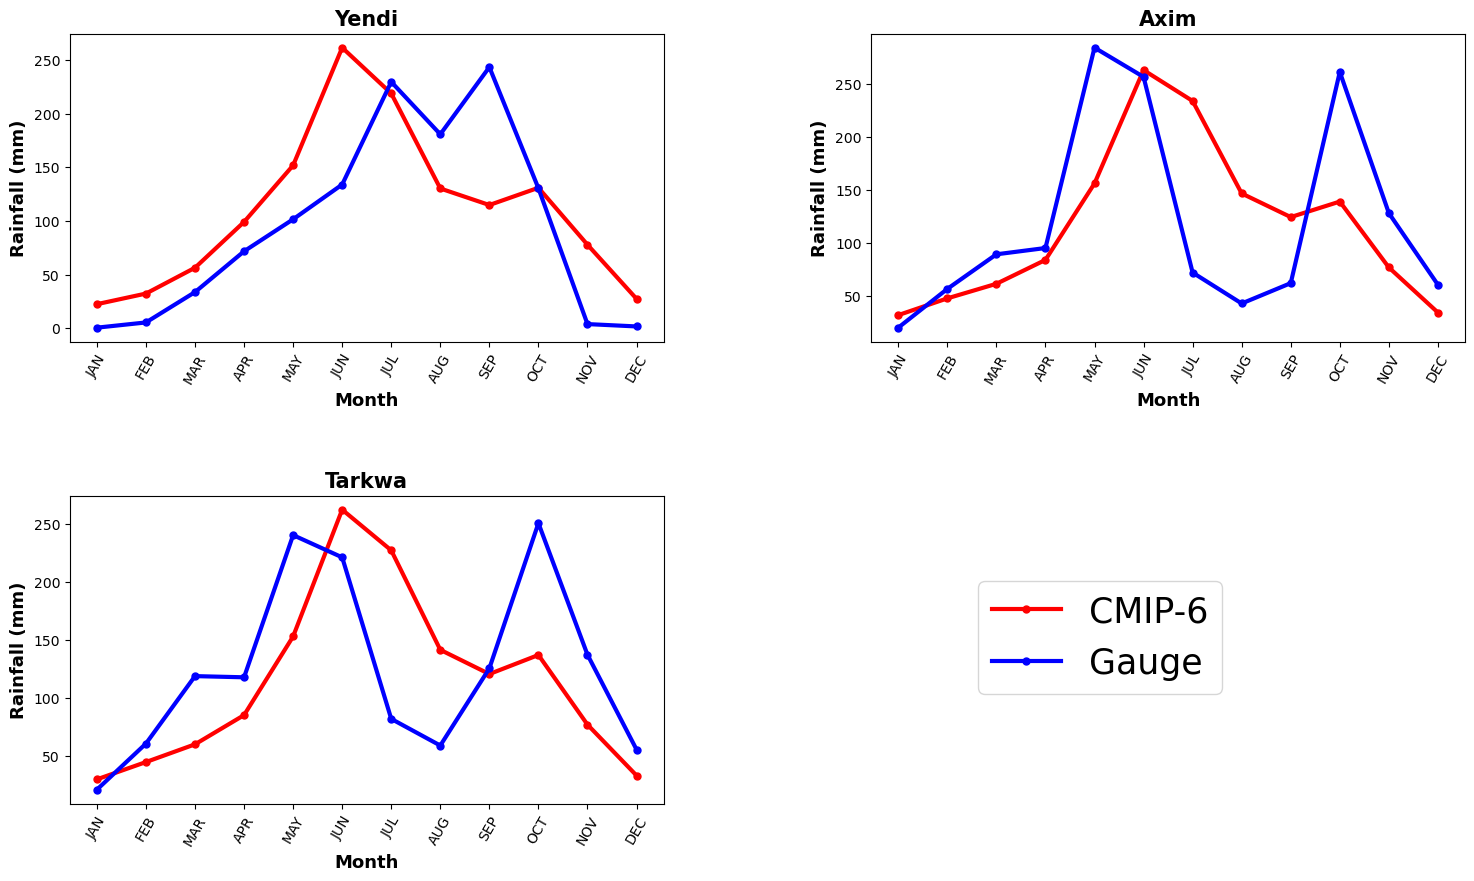

In [8]:
fig, axes = plt.subplots(ncols=2, nrows=2, figsize=(18,10),sharex = False)
#plt.subplots_adjust(bottom=0.05, top=0.95)
plt.subplots_adjust(hspace=0.5, wspace=0.35, )

Mon =["JAN","FEB","MAR","APR","MAY","JUN","JUL","AUG","SEP","OCT","NOV","DEC"]
axes[1,1].remove()

axes[0,0].set_title('Yendi', fontsize = 15,fontweight = "bold")
axes[0,0].plot(cmip_mon.Yendi, label = 'CMIP-6', color = 'red', lw = 3, marker = 'o', markersize = 5)
axes[0,0].plot(gauge_mon.Yendi, label = 'Gauge', color = 'blue', lw = 3, marker = 'o', markersize = 5)


axes[0,1].set_title('Axim', fontsize = 15, fontweight = "bold")
axes[0,1].plot(cmip_mon.Axim, label = 'CMIP-6', color = 'red', lw = 3, marker = 'o', markersize = 5)
axes[0,1].plot(gauge_mon.Axim, label = 'Gauge', color = 'blue', lw = 3, marker = 'o', markersize = 5)
axes[0,1].set_xticks(np.arange(0,12,1))
axes[0,1].set_xticklabels(Mon, rotation = 60)


axes[1,0].set_title('Tarkwa', fontsize = 15, fontweight = "bold")
axes[1,0].plot(cmip_mon.Tarkwa, label = 'CMIP-6', color = 'red', lw = 3, marker = 'o', markersize = 5)
axes[1,0].plot(gauge_mon.Tarkwa, label = 'Gauge', color = 'blue', lw = 3, marker = 'o', markersize = 5)
axes[1,0].legend(fontsize = 25,loc= 'lower left', ncol=1, bbox_to_anchor=(1.5, 0.3))
#axes[0,0].set_ylabel('FOREST \nRAI',fontsize=12, fontweight = "bold")

ax = axes.flatten()
for ax in axes:
    ax[0].set_xlabel('Month',fontsize = 13,fontweight = "bold")#, fontweight = "bold")
    ax[1].set_xlabel('Month',fontsize = 13, fontweight = "bold")
    
    ax[0].set_ylabel('Rainfall (mm)',fontsize = 13, fontweight = "bold")
    ax[1].set_ylabel('Rainfall (mm)',fontsize = 13, fontweight = "bold")#, fontweight = "bold")
    ax[0].set_xticks(np.arange(0,12,1))
    ax[0].set_xticklabels(Mon, rotation = 60)
    
    #ax[1].set_xticklabels(Mon, rotation = 60)
    
    
    

plt.savefig(' MONTHLY.jpg')

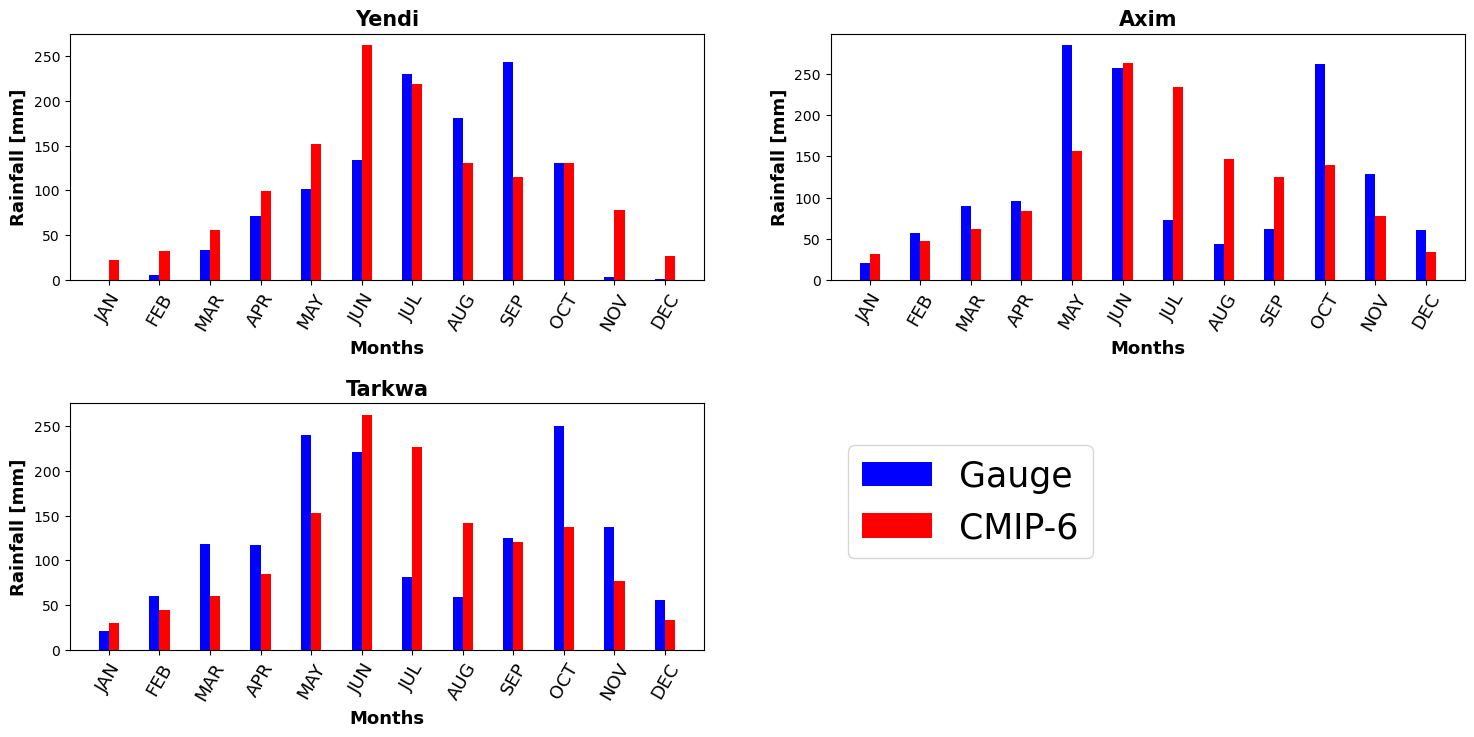

In [9]:
fig, axes = plt.subplots(ncols = 2, nrows = 2,figsize = (18,8))
plt.subplots_adjust(hspace = 0.5, wspace = 0.2)


y = np.arange(len(Mon))
# plotting bar chart
axes[0,0].set_title('Yendi', fontweight = 'bold', fontsize = 15,)
axes[0,0].bar(y-0.1, gauge_mon.Yendi, color='blue', width = 0.2,  label = 'Gauge')
axes[0,0].bar(y+0.1, cmip_mon.Yendi, color='red', width = 0.2,  label = 'CMIP-6')
axes[0,0].set_xticks(np.arange(0,12,1))
axes[0,0].set_xticklabels(Mon, rotation = 60, fontsize = 13)


axes[0,1].set_title('Axim', fontweight = 'bold', fontsize = 15)
axes[0,1].bar(y-0.1, gauge_mon.Axim, color='blue', width = 0.2,  label = 'Gauge')
axes[0,1].bar(y+0.1, cmip_mon.Axim, color='red', width = 0.2,  label = 'CMIP-6')
axes[0,1].set_xticks(np.arange(0,12,1))
axes[0,1].set_xticklabels(Mon, rotation = 60, fontsize = 13)




axes[1,0].set_title('Tarkwa', fontweight = 'bold', fontsize = 15,)
axes[1,0].bar(y-0.1, gauge_mon.Tarkwa, color='blue', width = 0.2,  label = 'Gauge')
axes[1,0].bar(y+0.1, cmip_mon.Tarkwa, color='red', width = 0.2,  label = 'CMIP-6')
axes[1,0].set_xticks(np.arange(0,12,1))
axes[1,0].set_xticklabels(Mon, rotation = 60, fontsize = 13)
axes[1,0].legend(fontsize = 25,loc= 'lower left', ncol=1, bbox_to_anchor=(1.2, 0.3))
axes[1,0].set_ylabel('Rainfall (mm)',fontsize=12, fontweight = "bold")


#axes[0,1].set_title('Timeseries for August', fontweight = 'bold', fontsize = 13)
#axes[0,0].set_title('Bar Chart for August', fontweight = 'bold', fontsize = 13)



#axes[1,0].plot(x, y1, color = 'red', lw = 3, marker = 'o', markersize = '5')
#axes[1,0].bar(x,y1, color = 'blue')
#axes[1,0].set_title('Bar Chart and Timseries for June', fontweight = 'bold', fontsize = 13)


axes[1,1].remove()

ax = axes.flatten()
for i, a in enumerate(ax):
    #ax[i].set_xlim(1898,2017)
    ax[i].set_ylabel("Rainfall [mm]" ,fontweight = 'bold', fontsize = 13)
    ax[i].set_xlabel("Months" ,fontweight = 'bold', fontsize = 13)
    #ax[i].set_xticks(np.arange(0,6,1))
    #ax[i].set_xticklabels(years, rotation = 60)

plt.savefig('Monthly_barchart.jpg')

## correlation and significance value

In [10]:
Yendir = st.pearsonr( gauge_ann.Yendi, cmip_ann.Yendi)
Aximr = st.pearsonr( gauge_ann.Axim, cmip_ann.Axim)
Tarkwar = st.pearsonr( gauge_ann.Tarkwa, cmip_ann.Tarkwa)


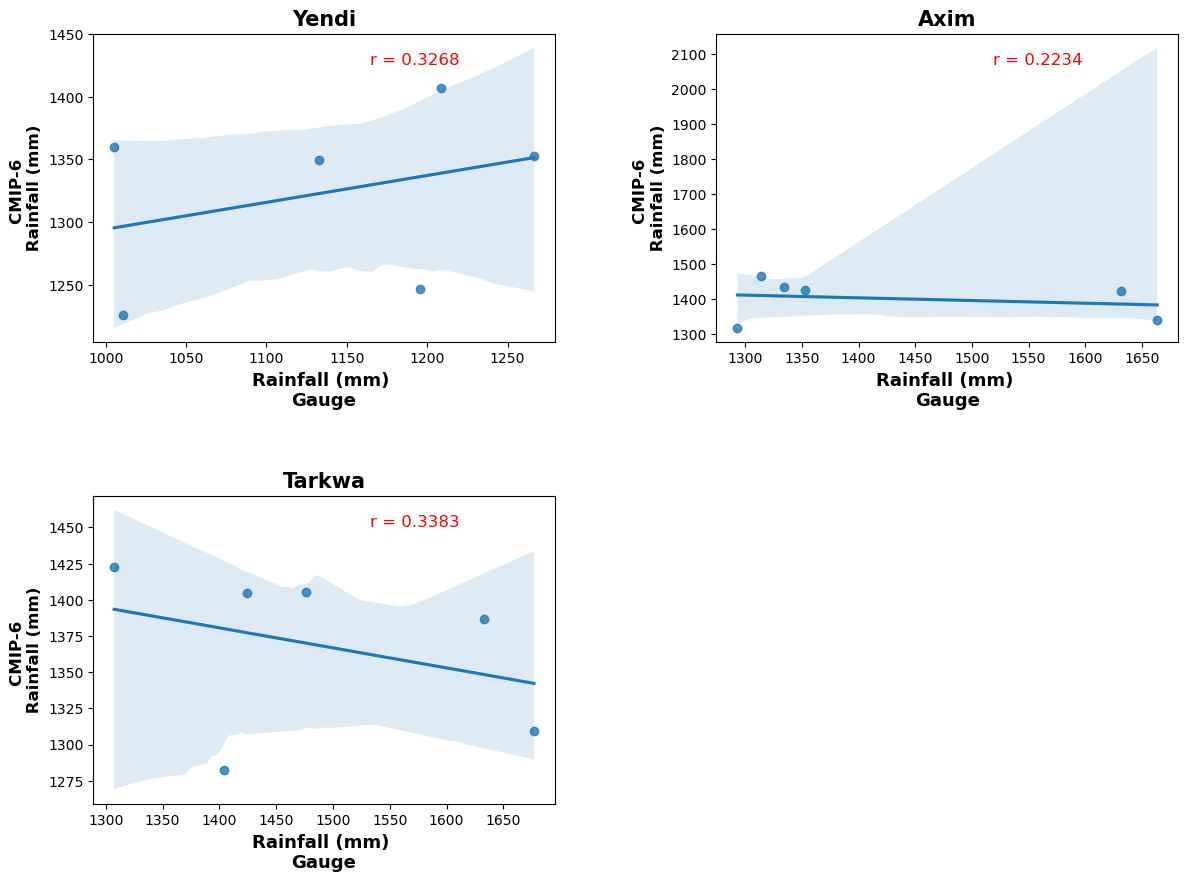

In [11]:
fig, axes = plt.subplots(ncols=2, nrows=2, figsize=(14,10),sharex = False)
#plt.subplots_adjust(bottom=0.05, top=0.95)
plt.subplots_adjust(hspace=0.5, wspace=0.35, )


axes[1,1].remove()
sns.regplot(gauge_ann.Yendi, cmip_ann.Yendi, ax = axes[0,0])
axes[0,0].set_title('Yendi', fontsize = 15,fontweight = "bold")
axes[0,0].text(0.6,0.9, 'r = 0.3268', color= 'r', transform = axes[0,0].transAxes, fontsize = 12)

axes[0,1].set_title('Axim', fontsize = 15, fontweight = "bold")
sns.regplot(gauge_ann.Axim, cmip_ann.Axim, ax = axes[0,1])
axes[0,1].text(0.6,0.9, 'r = 0.2234', color= 'r', transform = axes[0,1].transAxes, fontsize = 12)

axes[1,0].set_title('Tarkwa', fontsize = 15, fontweight = "bold")
sns.regplot(gauge_ann.Tarkwa, cmip_ann.Tarkwa, ax = axes[1,0])
axes[1,0].text(0.6,0.9, 'r = 0.3383', color= 'r', transform = axes[1,0].transAxes, fontsize = 12)
#axes[1,0].legend(fontsize = 25,loc= 'lower left', ncol=1, bbox_to_anchor=(1.5, 0.3))
axes[0,0].set_ylabel('CMIP-6 \n Rainfall (mm) ',fontsize=12, fontweight = "bold")
axes[1,0].set_ylabel('CMIP-6 \n Rainfall (mm) ',fontsize=12, fontweight = "bold")
axes[0,1].set_ylabel('CMIP-6 \n Rainfall (mm) ',fontsize=12, fontweight = "bold")
ax = axes.flatten()
for ax in axes:
    ax[0].set_xlabel('Rainfall (mm) \nGauge',fontsize = 13,fontweight = "bold")#, fontweight = "bold")
    ax[1].set_xlabel('Rainfall (mm) \nGauge',fontsize = 13, fontweight = "bold")#, fontweight = "bold")
    #ax[0].set_xticks(np.arange(0,12,1))
    #ax[1].set_xticks(np.arange(0,12,1))
    #ax[0].set_xticklabels(Mon, rotation = 60)
    #ax[1].set_xticklabels(Mon, rotation = 60)
    
    
    
       

plt.savefig('REGRESSION.jpg')